In [1]:
import numpy as np
import copy

from scipy import signal
import scipy.io.wavfile as wavfile

import time
import os

import ffmpeg

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

import glob

## Initialization
import IPython.display as ipd
import librosa.display

In [2]:
path = '_input/'
path_where_to_save = '_output/'
file_name = 'test.wav'
impulse_response_path = '_filters/'

In [3]:
def convert_signal(path):
    """
    Convert m4a signal to wav signal
    
    Parameters:
        path (string): relative path of folder where m4a iles are located
        
    Returns:
        None - Function will add new wav file to path directory
    """

    for filename in os.listdir(path):
        if (filename.endswith(".m4a")) or (filename.endswith(".mp4")):
            os.system("ffmpeg -i {0} -ar 16000 {1}.wav".format(path + filename, path + filename[:-4]))
        else:
            continue

In [4]:
def read_audio(path, file_name):
    '''
    Read files from specified path (relative or absolute)
    
    Parameters:
    path (string): relative path to read file
    file_name (string): name of file located in path we want to read
    
    Returns:
    tuple: rate and date of wav file
    
    '''
    rate, data = wavfile.read(str(path) + str(file_name))
    # data, rate = librosa.load(str(path) + str(filename))
    data = data.astype('int16')
    return rate, data

In [5]:
def write_audio(path, filename,  rate, data):
    '''
    Write files to specified path (relative or absolute) with volume transformation
    
    Parameters:
    path (string): relative path to write file
    file_name (string): name of file we want to save to located path
    rate (int): audio rate
    data (nd.array): the data we want to save
    volume (int): by default it settled 1, which means no transformation

    Returns:
    Boolean: If writing was finished successfully 
    
    '''
    data = copy.deepcopy(data)
    data = data.astype('int16')
    wavfile.write(str(path) + str(filename), rate, data)
    return True

In [6]:
def plot_waveform(data, start, end):
    '''
    Signal Visualization
    
    Parameters:
    data (nd.array): the data we want to visualize
    start (int): start range
    end (int): end range

    Returns:
    None: just shows the graph  
    
    '''
    data = data[start:end]
    plt.plot(data)
    plt.ylabel('amplitude')
    plt.xlabel('samples')
    plt.show()
    return None

In [7]:
convert_signal(path)

In [8]:
sampling_rate, data = read_audio(path, file_name)
ipd.Audio(data, rate=sampling_rate)

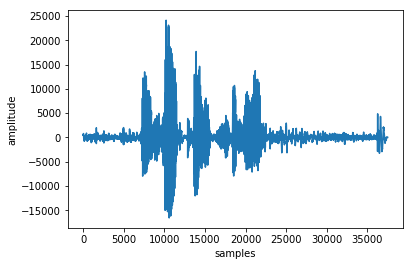

In [9]:
plot_waveform(data, 0, len(data))

# Convolve my signal with impulse response

In [10]:
all_filters = [y for y in os.listdir(impulse_response_path) if '.wav' in y]

In [11]:
max_ampl = np.max(np.abs(data))

for impulse_index in range(len(all_filters)):
    filter_sampling_rate, filter_data = read_audio(impulse_response_path, all_filters[impulse_index])
    
    conv_data = signal.fftconvolve(data, filter_data)
    filtered = max_ampl / np.max(np.abs(conv_data)) * conv_data # scaling output to have the same max as input
    
    write_audio(path_where_to_save, 'filtered_with_' + str(all_filters[impulse_index][:-4]) + '_impulse.wav', sampling_rate, filtered)
    

In [12]:
# filter_sampling_rate, filter_data = read_audio(impulse_response_path, all_filters[22])
# ipd.Audio(filter_data, rate=filter_sampling_rate)
# plot_waveform(filter_data, 0, len(filter_data))